Machine Learning Models  

In order to understand what happens under the hood when using ML libraries, the K Nearest Neighbors algorithm is built using loops, along with cross validation and confusion matrices 

In [1]:

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from math import sqrt
from random import randrange
from random import seed
import scipy.spatial
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline 

In [2]:
mySeed=1234567 # seed for random number 

# load Iris dataset as easily accessible 
iris = datasets.load_iris() 

X = iris.data # acquire features
y = iris.target # acquire targets
#print(iris.DESCR)  #print dataset description

# create noisy data 
np.random.seed(mySeed) 
X_Noise=X+np.random.normal(0,0.5,X.shape)

In [3]:
# create functions to find Euclidean and Manhattan distances  

def euclidean_distance(row1, row2):
    row1, row2 = np.array(row1), np.array(row2)
    distance = 0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

In [4]:
def manhattan(row1, row2): 
    dist = 0
    for i in range(len(row1)):
        dist = dist + abs(row1[i]-row2[i])
    return dist;

In [5]:
# Split into training and testing data 

arr_rand = np.random.rand(X.shape[0])
    
split = arr_rand < np.percentile(arr_rand, 75)

X_train = X[split]
 
y_train = y[split]
 
X_test =  X[~split]
 
y_test = y[~split]

In [8]:
# Build KNN 

class KNN:
    def __init__(self, k,):  # requires neighbors value input 
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
  

    def predict(self, X_test):
        final_output = []  
        for i in range(len(X_test)):  # iterate through the length of test data
            d = []
            votes = []
            for j in range(len(X_train)):
                dist = euclidean_distance(X_train[j] , X_test[i]) # acquire distance data/target
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            for d, j in d:
                votes.append(y_train[j])
            ans = Counter(votes).most_common(1)[0][0]  # use counter for vote tally 
            final_output.append(ans)

        return final_output

    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        return (predictions == y_test).sum() / len(y_test)

In [9]:
# Test model with random k value 

clf = KNN(5)   
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
for i in prediction:
    print(i, end= ' ')
print()     # get empty row 
for i in y_test:
    print(i,end=' ')
prediction == y_test

clf.score(X_test, y_test)  # return a percentage accuracy 

0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2 
0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 

0.9473684210526315

In [10]:
# create confusion matrix from the KKN function 

def conf_matrix(actual, predicted):

    classes = np.unique(actual) # extract the different classes
    matrix = np.zeros((len(classes), len(classes)), dtype=int) # initialize the confusion matrix with zeros

    for i in range(len(classes)):
        for j in range(len(classes)):

            matrix[i, j] = np.sum((actual == classes[i]) & (predicted == classes[j]))

    return matrix

In [11]:
KNN_Matrix = pd.DataFrame(conf_matrix(y_test, prediction))
KNN_Matrix

,0,1,2
0,13,0,0
1,0,11,1
2,0,1,12


In [31]:
# check the result against sklearn 
confusion_matrix(y_test, prediction) 

array([[13,  0,  0],
       [ 0, 11,  1],
       [ 0,  1, 12]], dtype=int64)

In [12]:
# Create more intuitive matrix plot 
def plot_confusion_matrix(matrix, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(matrix, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(matrix.columns))
    plt.xticks(tick_marks, matrix.index)
    plt.yticks(tick_marks, matrix.index)
    #plt.tight_layout()
    plt.ylabel('actual')
    plt.xlabel('pred')

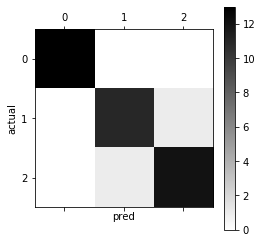

In [13]:
plot_confusion_matrix(KNN_Matrix)

In [14]:
# Dataframe for crossfold

df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])

In [15]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [16]:
# create function for cross fold split

def cross_validation_split(dataset, folds):  # requires input of dataframe and numnder of folds 
        dataset_split = []
        df_copy = dataset
        fold_size = int(df_copy.shape[0] / folds)
        
        # for loop to save each fold
        for i in range(folds):
            fold = []
            # while loop to add elements to the folds
            while len(fold) < fold_size:  # keep within fold size
                # select a random element
                r = randrange(df_copy.shape[0])
                # determine the index of this element 
                index = df_copy.index[r]
                # save the randomly selected line 
                fold.append(df_copy.loc[index].values.tolist())
                # delete the randomly selected line from so is only taken once
                
                df_copy = df_copy.drop(index)
            # save the fold     
            dataset_split.append(np.asarray(fold))
            
        return dataset_split 

In [231]:
cross_validation_split(df, 5) # check function 

[array([[6.8, 3.2, 5.9, 2.3, 2. ],
        [6.3, 2.5, 4.9, 1.5, 1. ],
        [5.2, 3.4, 1.4, 0.2, 0. ],
        [4.8, 3. , 1.4, 0.1, 0. ],
        [5.1, 3.4, 1.5, 0.2, 0. ],
        [5.7, 2.9, 4.2, 1.3, 1. ],
        [7.7, 2.6, 6.9, 2.3, 2. ],
        [5.8, 2.8, 5.1, 2.4, 2. ],
        [6.3, 3.3, 6. , 2.5, 2. ],
        [7.1, 3. , 5.9, 2.1, 2. ],
        [6.2, 2.2, 4.5, 1.5, 1. ],
        [6.8, 3. , 5.5, 2.1, 2. ],
        [4.9, 3. , 1.4, 0.2, 0. ],
        [7. , 3.2, 4.7, 1.4, 1. ],
        [6.2, 3.4, 5.4, 2.3, 2. ],
        [6.8, 2.8, 4.8, 1.4, 1. ],
        [5.6, 3. , 4.5, 1.5, 1. ],
        [6.7, 3.1, 5.6, 2.4, 2. ],
        [5.6, 2.8, 4.9, 2. , 2. ],
        [5. , 3.3, 1.4, 0.2, 0. ],
        [5.8, 2.7, 3.9, 1.2, 1. ],
        [5.8, 2.7, 5.1, 1.9, 2. ],
        [6.4, 2.8, 5.6, 2.1, 2. ],
        [4.6, 3.1, 1.5, 0.2, 0. ],
        [7.2, 3.2, 6. , 1.8, 2. ],
        [6.9, 3.1, 5.4, 2.1, 2. ],
        [6.2, 2.9, 4.3, 1.3, 1. ],
        [4.9, 3.1, 1.5, 0.1, 0. ],
        [4.7, 3.2, 1

In [17]:
# Additional KNN approach for CV use 

def KNN3(X_train,y_train, X_test, k, dist,q=2): 
    pred = [] # collect predicts
    
    if isinstance(X_test, np.ndarray):
        X_test=pd.DataFrame(X_test)
    if isinstance(X_train, np.ndarray):
        X_train=pd.DataFrame(X_train) 
        
    for i in range(len(X_test)):    
        # Calculating distances for our test point
        newdist = np.zeros(len(y_train))

        for j in range(len(y_train)):
            newdist[j] = dist(X_train.iloc[j,:], X_test.iloc[i,:]) # call distance function
    
        # Merge 'actuals' + distance
        newdist = np.array([newdist, y_train])

        idx = np.argsort(newdist[0,:]) # get closest neighbours + reindex

        # Sorting new distances
        newdist = newdist[:,idx]
        
        c = {'0':0,'1':0,'2':0 } # collect + count K labels to determine max
         
        for j in range(k):
            c[str(int(newdist[1,j]))] = c[str(int(newdist[1,j]))] + 1

        key_max = max(c.keys(), key=(lambda k: c[k]))
        pred.append(int(key_max))
        
    return pred

In [22]:
def kfoldCV(dataset, f=5, k=5):  # takes in dataset, fold, and neighbours 
    data=cross_validation_split(df,f) # take from datasplit function
    result=[]
    # determine training and test sets 
    for i in range(f):
        r = list(range(f))
        r.pop(i)  # grabs last value
        for j in r :      # iterate through folds
            if j == r[0]:
                cv = data[j]
            else:    
                cv=np.concatenate((cv,data[j]), axis=0)
        
        global test
        test = KNN3(cv[:,0:4],cv[:,4],data[i][:,0:4],k, euclidean_distance) # using previous KNN, using 5
        # array, target 
        acc=(test == data[i][:,4]).sum() # summing where predictions were correct
        result.append(acc/len(test))    # divide by total test number for accuracy value
        
        global idk
        idk=[]
        for i in range(f):
            idk.append(data[i][:,4]) # get predictions for conf matrix 
        
    return result

In [23]:
kfoldCV(df, f=5, k=5) # returns list of accuracies 

[0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9333333333333333,
 1.0]

In [24]:
# create noisy dataset
mu, sigma = 0, 0.1 
noise = np.random.normal(mu, sigma, [150,5])

In [25]:
df_noise = df + noise

In [26]:
mycols = (kfoldCV(df_noise, f=5, k=5))

In [40]:
# run crossfold for clean dataset with random values and distance types
# for thorough exploration would loop through number range/distance, PC currently limited 

CleanA=[]  # empty list to append 
CleanA.append((kfoldCV(df, f=5, k=5))[0]) # fold 1, k=5, E
CleanA.append((kfoldCV(df, f=5, k=3))[1])  #f2 Euclidean
CleanA.append((kfoldCV(df, f=5, k=7))[2]) #f3  Manhattan 
CleanA.append((kfoldCV(df, f=5, k=10))[3]) # f4 Eclidean
CleanA.append((kfoldCV(df, f=5, k=3))[4]) # f5 Manhattan 

In [41]:
CleanA # check values

[0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9333333333333333,
 0.9333333333333333]

In [42]:
FoldNo=[1,2,3,4,5]
kNo=[5,3,7,10,4]
Accuracy = CleanA
DisType = ['E','E','M','E','M']

In [43]:
dict = {'Fold': FoldNo, 'Accuracy': CleanA, 'k': kNo, 'Distance':DisType} 

In [44]:
CleanSummary = pd.DataFrame(dict)
CleanSummary

,Fold,Accuracy,k,Distance
0,1,0.966667,5,E
1,2,0.933333,3,E
2,3,0.966667,7,M
3,4,0.933333,10,E
4,5,0.933333,4,M


In [38]:
CleanSummary.loc['Total'] = pd.Series(CleanSummary['Accuracy'].sum()/5, index=['Accuracy'])
CleanSummary.loc['SD'] = pd.Series(CleanSummary.loc[:,"Accuracy"].std(), index=['Accuracy'])

In [39]:
CleanSummary

,Fold,Accuracy,k,Distance
0,1.0,1.000000,5.0,E
1,2.0,0.900000,3.0,E
2,3.0,0.933333,7.0,M
3,4.0,0.966667,10.0,E
4,5.0,0.966667,4.0,M
Total,NaN,0.953333,NaN,NaN
SD,NaN,0.033993,NaN,NaN


In [45]:
# repeat for noisy dataset 
NoiseA=[] # empty list
NoiseA.append((kfoldCV(df_noise, f=5, k=5))[0]) # fold 1, k=5, Euclidean
NoiseA.append((kfoldCV(df_noise, f=5, k=3))[1])  #f2 E
NoiseA.append((kfoldCV(df_noise, f=5, k=7))[2]) #f3 Manhattan 
NoiseA.append((kfoldCV(df_noise, f=5, k=10))[3]) # f4 Euclidean
NoiseA.append((kfoldCV(df_noise, f=5, k=3))[4]) # f5 Manhattan 

In [46]:
NoiseA # check putput

[0.9, 0.9333333333333333, 0.9333333333333333, 0.9, 0.9333333333333333]

In [47]:
dict2 = {'Fold': FoldNo, 'Accuracy': NoiseA, 'k': kNo, 'Distance':DisType} 
NoiseSummary = pd.DataFrame(dict2)
NoiseSummary.loc['Total'] = pd.Series(NoiseSummary['Accuracy'].sum()/5, index=['Accuracy'])
NoiseSummary.loc['SD'] = pd.Series(NoiseSummary.loc[:,"Accuracy"].std(), index=['Accuracy'])
NoiseSummary

,Fold,Accuracy,k,Distance
0,1.0,0.900000,5.0,E
1,2.0,0.933333,3.0,E
2,3.0,0.933333,7.0,M
3,4.0,0.900000,10.0,E
4,5.0,0.933333,4.0,M
Total,NaN,0.920000,NaN,NaN
SD,NaN,0.016330,NaN,NaN


In [48]:
idk2=pd.DataFrame(idk) # alter datatype for matrix plot

In [49]:
test2=pd.Series(test)  # alter datatype for matrix plot

In [50]:
for n in range(0,5):
    matrix_test = pd.crosstab(test2, idk2.iloc[n], rownames=['Actual'], colnames=['Predicted'], margins=True)
    print (pd.DataFrame(matrix_test))

Predicted  0.0  1.0  2.0  All
Actual                       
0            1    9    1   11
1            1    5    3    9
2            2    4    4   10
All          4   18    8   30
Predicted  0.0  1.0  2.0  All
Actual                       
0            5    4    2   11
1            3    4    2    9
2            2    3    5   10
All         10   11    9   30
Predicted  0.0  1.0  2.0  All
Actual                       
0            6    3    2   11
1            6    1    2    9
2            4    2    4   10
All         16    6    8   30
Predicted  0.0  1.0  2.0  All
Actual                       
0            4    2    5   11
1            4    4    1    9
2            1    2    7   10
All          9    8   13   30
Predicted  0.0  1.0  2.0  All
Actual                       
0           11    0    0   11
1            0    7    2    9
2            0    0   10   10
All         11    7   12   30


In [51]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.index)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel('actual')
    plt.xlabel('pred')

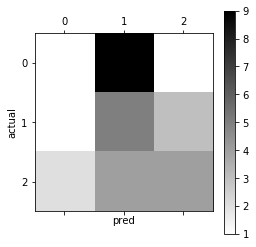

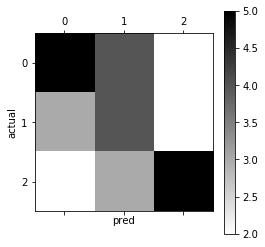

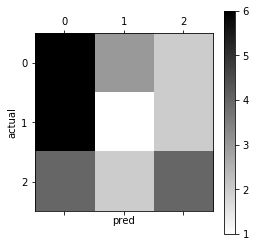

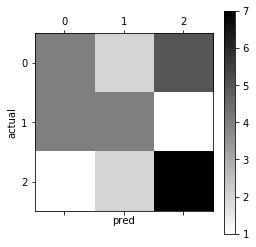

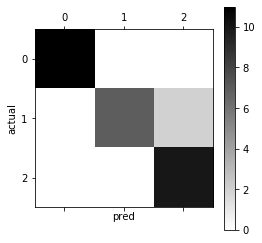

In [52]:
# create confusion matrices for clean dataset crossfold 

for n in range(0,5):
    matrix_clean = pd.crosstab(test2, idk2.iloc[n])
    plot_confusion_matrix(matrix_clean, title='Confusion matrix', cmap=plt.cm.gray_r)

In [53]:
idkN=pd.DataFrame(idk) # alter datatype for matrix plot

In [54]:
for n in range(0,5):
    noise_m = pd.crosstab(test2, idkN.iloc[n], rownames=['Actual'], colnames=['Predicted'], margins=True)
    print (pd.DataFrame(noise_m))

Predicted  0.0  1.0  2.0  All
Actual                       
0            1    9    1   11
1            1    5    3    9
2            2    4    4   10
All          4   18    8   30
Predicted  0.0  1.0  2.0  All
Actual                       
0            5    4    2   11
1            3    4    2    9
2            2    3    5   10
All         10   11    9   30
Predicted  0.0  1.0  2.0  All
Actual                       
0            6    3    2   11
1            6    1    2    9
2            4    2    4   10
All         16    6    8   30
Predicted  0.0  1.0  2.0  All
Actual                       
0            4    2    5   11
1            4    4    1    9
2            1    2    7   10
All          9    8   13   30
Predicted  0.0  1.0  2.0  All
Actual                       
0           11    0    0   11
1            0    7    2    9
2            0    0   10   10
All         11    7   12   30


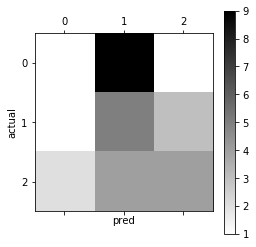

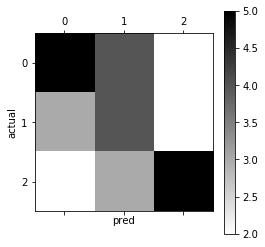

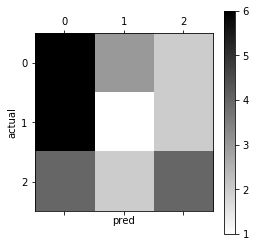

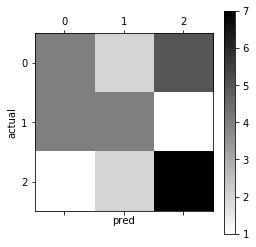

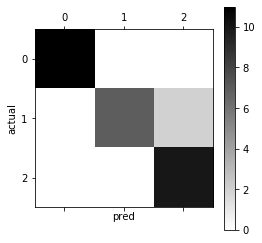

In [55]:
for n in range(0,5):
    noise_m = pd.crosstab(test2, idkN.iloc[n])
    plot_confusion_matrix(noise_m, title='Confusion matrix', cmap=plt.cm.gray_r)